数据共有28501条记录，每条记录五个属性：上游水库出水量，下游进水量，上下游之间三个降雨信息观测点的雨量信息。目标是根据这些信息预测下游水库的进水量。

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import style
style.use('ggplot')   #图画风格
plt.rcParams['font.sans-serif'] = ['SimHei']  #字体风格
plt.rcParams['axes.unicode_minus'] = False    #是否中文字体变小
plt.rcParams['figure.figsize'] = (12,7)       #图像大小

In [3]:
FILE_NAME = '../input/all_data.csv'  
START_POINT = '2015/1/1 0:00:00'     #第一个时刻点
source_df = pd.read_csv(FILE_NAME,index_col=0)   #读入csv文件
index_col = pd.date_range(START_POINT,periods=len(source_df),freq='h')   #产生日期index
source_df = pd.DataFrame(np.array(source_df),index=index_col,columns=source_df.columns) #产生标准日期格式的DataFrame
print("产生的日期格式like this: ",source_df.index[0])
print("dataframe de 第一条记录如下:")
source_df.head(1)

产生的日期格式like this:  2015-01-01 00:00:00
dataframe de 第一条记录如下:


,zhexi_in,xiaoxi_out,lengshuijiang_add,xinhua_add,zhexi_add
2015-01-01,180.475,67.0,0.0,0.0,0.0


## 1.数据概览

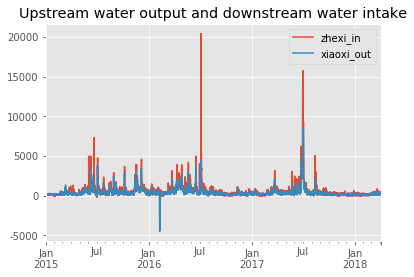

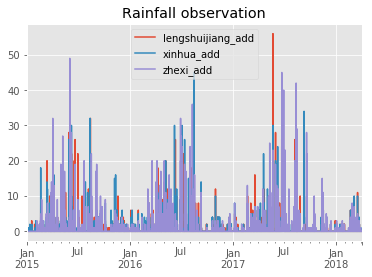

In [5]:
#showing variable curves and histgrams
source_df[['zhexi_in','xiaoxi_out']].plot(title='Upstream water output and downstream water intake')
plt.show()
source_df[['lengshuijiang_add','xinhua_add','zhexi_add']].plot(title='Rainfall observation')
plt.show()
# source_df[['zhexi_in','xiaoxi_out']].hist(bins=4)  #上下游进出水量分布情况
# plt.show()
# source_df[['lengshuijiang_add','xinhua_add','zhexi_add']].hist(bins=4) #降雨信息分布情况
# plt.show()